In [1]:
import pandas as pd
import numpy as np

black_df = pd.read_csv('blackFriday_train.csv')

In [2]:
black_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_df.shape # 550068 rows and 12 columns

(550068, 12)

In [4]:
black_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
black_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
black_df['Purchase'].mean()

9263.968712959126

In [7]:
black_df['Purchase'].median()

8047.0

In [8]:
black_df['Age'].value_counts() #7 age groups

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<AxesSubplot:ylabel='Age'>

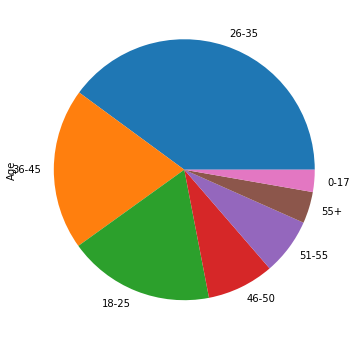

In [9]:
black_df['Age'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

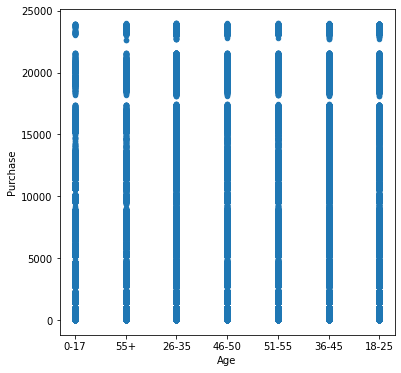

In [10]:
black_df.plot(kind='scatter',x='Age',y='Purchase', figsize=(6,6))

Text(0, 0.5, 'Purchase')

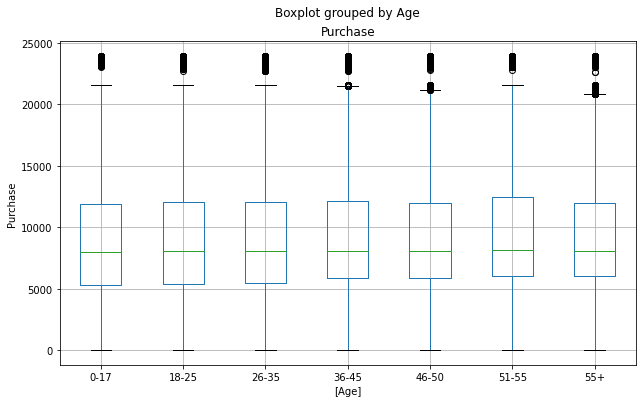

In [11]:
ax = black_df[['Purchase','Age']].boxplot(by='Age',figsize=(10,6))
ax.set_ylabel('Purchase')

In [12]:
black_df['Purchx_per_occupation'] = black_df['Purchase']/black_df['Occupation']
black_df['Purchx_per_occupation'].head()

0     837.0000
1    1520.0000
2     142.2000
3     105.7000
4     498.0625
Name: Purchx_per_occupation, dtype: float64

<AxesSubplot:xlabel='Age'>

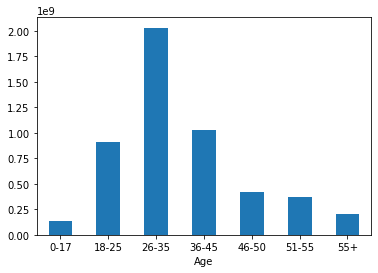

In [13]:
df1 = black_df.groupby("Age")['Purchase'].sum()
df1.plot(kind='bar',x='Age', y='Purchase',rot=0)

<AxesSubplot:>

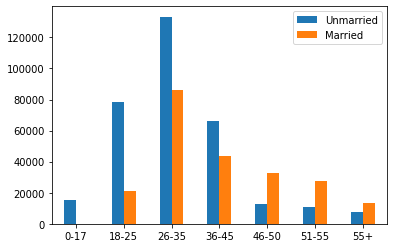

In [14]:
df2 = black_df.groupby('Age')
Df0 = []
Df1 = []
index = []
for age,agedf in df2:
    #count of married in a particular age group
    Df1.append(df2.get_group(age)['Marital_Status'].apply(lambda x: 1 if x == 1 else 0 ).sum())
    #count of unmarried in a particular age group
    Df0.append(df2.get_group(age)['Marital_Status'].apply(lambda x: 1 if x == 0 else 0 ).sum())
    index.append(age)
    
d = {'Unmarried':Df0,'Married': Df1}
data = pd.DataFrame(d,index=index)
data.plot(kind = 'bar', rot=0)

<AxesSubplot:>

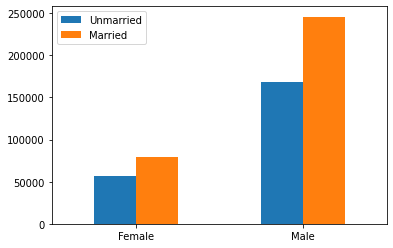

In [15]:
df3 = black_df.groupby('Gender')
Df2 = []
Df3 = []
index1 = []
for gender,genderdf in df3:
    Df2.append(df3.get_group(gender)['Marital_Status'].apply(lambda x: 1 if x == 1 else 0 ).sum())
    Df3.append(df3.get_group(gender)['Marital_Status'].apply(lambda x: 1 if x == 0 else 0 ).sum())
    if gender=='F':
        index1.append('Female')
    else:
        index1.append('Male')
    
d1 = {'Unmarried':Df2,'Married': Df3}
data1 = pd.DataFrame(d1,index=index1)
data1.plot(kind = 'bar', rot=0)

<AxesSubplot:>

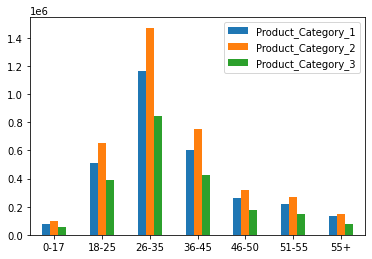

In [22]:
df1 = black_df.groupby('Age')
Df0 = []
Df1 = []
Df2 = []
index = []
for prodcat,prodcatdf in df1:
    Df0.append(df1.get_group(prodcat)['Product_Category_1'].sum())
    Df1.append(df1.get_group(prodcat)['Product_Category_2'].sum())
    Df2.append(df1.get_group(prodcat)['Product_Category_3'].sum())
    index.append(prodcat)
    
d = {'Product_Category_1':Df0,'Product_Category_2': Df1, 'Product_Category_3': Df2}
data = pd.DataFrame(d,index=index)
data.plot(kind = 'bar', rot=0)


<AxesSubplot:>

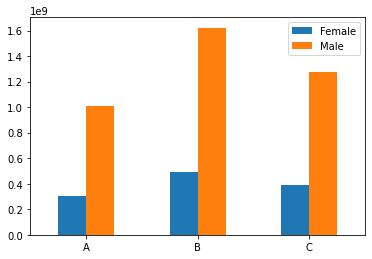

In [17]:
df1 = black_df.groupby('City_Category')
Df0 = []
Df1 = []
index = ['A','B','C']
a = df1.get_group('A')
data_A_F = a[a['Gender']=='F']['Purchase'].sum()
data_A_M = a[a['Gender']=='M']['Purchase'].sum()

b = df1.get_group('B')
data_B_F = b[b['Gender']=='F']['Purchase'].sum()
data_B_M = b[b['Gender']=='M']['Purchase'].sum()

c = df1.get_group('C')
data_C_F = c[c['Gender']=='F']['Purchase'].sum()
data_C_M = c[c['Gender']=='M']['Purchase'].sum()

M = [data_A_M, data_B_M, data_C_M]
F = [data_A_F, data_B_F, data_C_F]

dx = {'Female':F,'Male': M}
data = pd.DataFrame(dx,index=index)
data.plot(kind = 'bar', rot=0)